   # Comparative Analysis of Netflix and Amazon Prime 
## Exploring Trends, Ratings, and Content to Guide Consumers and Platforms
This notebook analyzes datasets from Netflix and Amazon Prime, comparing content types, genres, ratings, and more. With the rise of streaming platforms, consumers often face challenges in selecting the best platform for their preferences while streaming platforms face stiff competition requiring efficient strategies for better marketing. The goal is  to help consumers decide which platform suits their preferences and to guide platforms in improving content strategies

## **Objectives**
1. To compare the content offerings of Netflix and Amazon Prime, focusing on the proportion of movies vs. TV shows, genre availability, and country-specific differences.  
2. To analyze time-based trends, including platform growth over time and annual content additions.  
3. To evaluate audience suitability by examining differences in content ratings and age-specific offerings on each platform.  
4. To assess key metrics such as average content duration and representation of directors and cast.  
5. To identify unique offerings by exploring genres or content types exclusive to each platform.  

## Importing Necessary Libraries
Libraries for data manipulation, visualization, and analysis will be imported below.

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Loading the Datasets
We will first load and preview the datasets for Netflix and Amazon Prime.

In [2]:
netflix = pd.read_csv(r'C:\Users\PC\Desktop\Portfolio\Portfolio datasets\netflix_titles.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
amazon = pd.read_csv(r'C:\Users\PC\Desktop\Portfolio\Portfolio datasets\amazon_prime_titles.csv')
amazon.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


## Dataset Overview
From the dataset preview it can be observed that both datasets have simililar columns namely:
- show_id
- type
- title
- director
- cast
- country 
- date_added
- release_year
- rating 
- duration 
- listed_in 
- description

In [4]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


## Data Cleaning and Preprocessing

### 1. Handling missing values.
- The year from the 'date_added' column was extracted from the netflix dataset and placed into a new column named 'year_added'. The original column ('date_added') was then droped from the dataset.
- The date_added column was excluded for Amazon due to a significant lack of data (~98% missing), and country-based analyses will focus primarily on Netflix due to similar limitations in the Amazon dataset.
- All missing values in every column were replaced by 'unknown' to ensure there was uniform handling of missing values across all columns. It also avoided introducing  potentially incorrect data, which might occur if the mode or another imputation method was used. 

In [6]:
# Step 1: Strip leading/trailing whitespaces from the column
netflix['date_added'] = netflix['date_added'].str.strip()

# Step 2: Convert to datetime, coercing invalid formats to NaT (Not a Time)
netflix['date_added'] = pd.to_datetime(netflix['date_added'], errors='coerce')

# Extract the year and cast it to a string
netflix['year_added'] = netflix['date_added'].dt.year.astype('Int64')
netflix['year_added'] = netflix['year_added'].astype('string')

# Display the first few rows to confirm
netflix.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021


In [7]:
# Drop the original date_added column
netflix = netflix.drop(columns=['date_added'])

# Display the first few rows to confirm
netflix.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021


In [8]:
# Drop the original date_added column
amazon = amazon.drop(columns=['date_added'])

# Display the first few rows to confirm
amazon.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [9]:
# Netflix dataset
netflix['director'].fillna('Unknown', inplace=True)
netflix['cast'].fillna('Unknown', inplace=True)
netflix['country'].fillna('Unknown', inplace=True)
netflix['rating'].fillna('Unknown', inplace=True)
netflix['duration'].fillna('Unknown', inplace=True)
netflix['year_added'].fillna('Unknown', inplace=True)

# Amazon dataset
amazon['director'].fillna('Unknown', inplace=True)
amazon['cast'].fillna('Unknown', inplace=True)
amazon['country'].fillna('Unknown', inplace=True)
amazon['rating'].fillna('Unknown', inplace=True)


In [10]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8807 non-null   object
 8   duration      8807 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
 11  year_added    8807 non-null   string
dtypes: int64(1), object(10), string(1)
memory usage: 825.8+ KB


In [11]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      9668 non-null   object
 4   cast          9668 non-null   object
 5   country       9668 non-null   object
 6   release_year  9668 non-null   int64 
 7   rating        9668 non-null   object
 8   duration      9668 non-null   object
 9   listed_in     9668 non-null   object
 10  description   9668 non-null   object
dtypes: int64(1), object(10)
memory usage: 831.0+ KB


### 2. Checking for duplicates

In [12]:
netflix.duplicated().sum()

0

In [13]:
amazon.duplicated().sum()

0

## Exploratory Data Analysis
### 1. Content Comparison:
We will focus on how Netflix and Amazon Prime differ in terms of the type and variety of content they offer. For example, do they focus more on movies or TV shows? Which genres are most prevalent on each platform, and do certain countries have exclusive content?
Because the datasets are unequal, instead of raw counts, we will normalize these metrics by calculating percentages within each dataset.Weighting ensures that our analysis is fair and meaningful despite unequal dataset sizes. By focusing on proportions, we can compare the platforms without discarding data or introducing biases.

#### 1.1 What is the proportion of movies vs. TV shows on each platform?

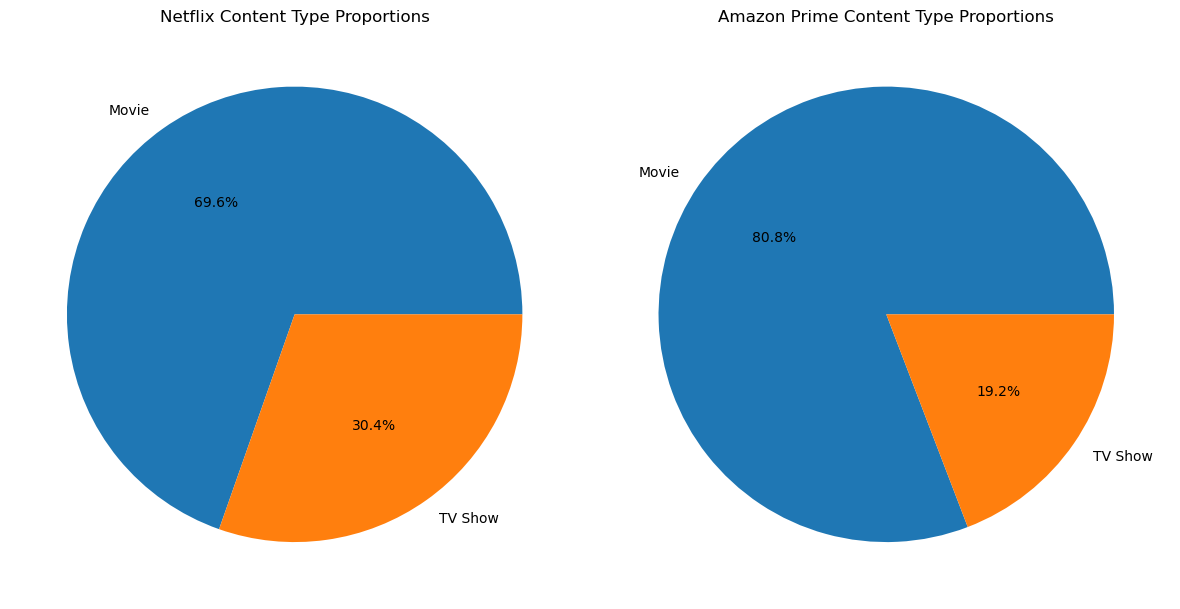

In [18]:
# Calculate proportions for content types (movies vs. TV shows)
def calculate_content_proportions(df, content_type_column):
    proportions = df[content_type_column].value_counts(normalize=True) * 100
    return proportions

# Example usage
netflix_proportions = calculate_content_proportions(netflix, 'type')
prime_proportions = calculate_content_proportions(amazon, 'type')

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Netflix Pie Chart
netflix_proportions.plot.pie(
    autopct='%1.1f%%',
    labels=netflix_proportions.index,
    ax=axes[0],  # Use the first subplot
    title='Netflix Content Type Proportions'
)
axes[0].set_ylabel('')  # Hide the y-axis label for cleanliness

# Amazon Prime Pie Chart
prime_proportions.plot.pie(
    autopct='%1.1f%%',
    labels=prime_proportions.index,
    ax=axes[1],  # Use the second subplot
    title='Amazon Prime Content Type Proportions'
)
axes[1].set_ylabel('')  # Hide the y-axis label for cleanliness

# Adjust layout to avoid overlapping
plt.tight_layout()

# Display the pie charts
plt.show()



#### Results
Our findings reveal:
- Netflix: 69.6% of the content is movies, while 30.4% is TV shows.

- Amazon Prime: 80.8% of the content is movies, while 19.2% is TV shows.

#### Insights
- Both platforms prioritize movies, but Amazon Prime has a stronger focus, with a larger proportion of its content dedicated to movies compared to Netflix.

- Netflix offers a more balanced mix, with a higher percentage of TV shows compared to Amazon, suggesting a more diverse content strategy.

#### 1.2 How does the availability of genres differ between Netflix and Amazon Prime?

In [21]:
# List unique genres in Netflix
netflix_genres = netflix['listed_in'].unique()

# List unique genres in Amazon Prime
amazon_genres = amazon['listed_in'].unique()

# Display unique genres
print("Unique genres in Netflix:")
print(netflix_genres)

print("\nUnique genres in Amazon Prime:")
print(amazon_genres)


Unique genres in Netflix:
['Documentaries' 'International TV Shows, TV Dramas, TV Mysteries'
 'Crime TV Shows, International TV Shows, TV Action & Adventure'
 'Docuseries, Reality TV'
 'International TV Shows, Romantic TV Shows, TV Comedies'
 'TV Dramas, TV Horror, TV Mysteries' 'Children & Family Movies'
 'Dramas, Independent Movies, International Movies'
 'British TV Shows, Reality TV' 'Comedies, Dramas'
 'Crime TV Shows, Docuseries, International TV Shows'
 'Dramas, International Movies' 'Children & Family Movies, Comedies'
 'British TV Shows, Crime TV Shows, Docuseries' 'TV Comedies, TV Dramas'
 'Documentaries, International Movies'
 'Crime TV Shows, Spanish-Language TV Shows, TV Dramas' 'Thrillers'
 'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure'
 'International TV Shows, TV Action & Adventure, TV Dramas'
 'Comedies, International Movies'
 'Comedies, International Movies, Romantic Movies'
 'Docuseries, International TV Shows, Reality TV'
 'Comedies, Inte

#### Genre Mapping

To simplify the analysis, we categorized the genres into broader categories based on the following mapping:

| **Broad Genre**                | **Specific Genres**                                                                                                      |
|--------------------------------|--------------------------------------------------------------------------------------------------------------------------|
| Action & Adventure             | Action & Adventure, TV Action & Adventure, Action, Adventure                                                             |
| Animation & Anime              | Animation, Anime, Anime Features, Anime Series                                                                           |
| Comedy                         | Comedies, Comedy, TV Comedies                                                                                            |
| Crime & Thriller               | Crime TV Shows, Thrillers, TV Thrillers, Suspense                                                                        |
| Documentary & Reality          | Documentaries, Documentary, Docuseries, Reality TV, Unscripted                                                           |
| Drama                          | Dramas, Drama, TV Dramas                                                                                                 |
| Family & Children              | Children & Family Movies, Kids, Kids' TV                                                                                |
| Fantasy & Sci-Fi               | Fantasy, Sci-Fi & Fantasy, Science Fiction, TV Sci-Fi & Fantasy                                                          |
| Horror                         | Horror Movies, Horror, TV Horror                                                                                        |
| International                  | International Movies, International TV Shows, International, Spanish-Language TV Shows, British TV Shows, Korean TV Shows|
| LGBTQ                          | LGBTQ Movies, LGBTQ                                                                                                     |
| Music & Concerts               | Music & Musicals, Music Videos and Concerts                                                                             |
| Romance                        | Romantic Movies, Romantic TV Shows, Romance                                                                             |
| Sports                         | Sports Movies, Sports                                                                                                   |
| Stand-Up & Talk Shows          | Stand-Up Comedy, Stand-Up Comedy & Talk Shows, Talk Show and Variety                                                     |
| Faith & Spirituality           | Faith & Spirituality                                                                                                    |
| Western                        | Western                                                                                                                 |
| Military & War                 | Military and War                                                                                                        |
| Classic & Cult                 | Classic Movies, Cult Movies, Classic & Cult TV                                                                          |
| Special Interest               | Special Interest, Science & Nature TV                                                                                   |
| Arts & Entertainment & Culture | Arts, Entertainment, and Culture, Arthouse                                                                              |
| Historical                     | Historical                                                                                                              |
| Teen & Young Adult             | Teen TV Shows, Young Adult Audience                                                                                     |
| Independent                    | Independent Movies                                                                                                      |

This categorization helps streamline the analysis and makes comparisons more meaningful.


In [30]:
# Define mapping of specific genres to broad categories
genre_mapping = {
    'Action & Adventure': ['Action & Adventure', 'TV Action & Adventure', 'Action', 'Adventure'],
    
    'Animation & Anime': ['Animation', 'Anime', 'Anime Features', 'Anime Series'],
    
    'Comedy': ['Comedies', 'Comedy', 'TV Comedies'],
    
    'Crime & Thriller': ['Crime TV Shows', 'Thrillers', 'TV Thrillers', 'Suspense'],
   
    'Documentary & Reality': ['Documentaries', 'Documentary', 'Docuseries', 'Reality TV', 'Unscripted'],
    
    'Drama': ['Dramas', 'Drama', 'TV Dramas'],
    
    'Family & Children': ['Children & Family Movies', 'Kids', "Kids' TV"],
    
    'Fantasy & Sci-Fi': ['Fantasy', 'Sci-Fi & Fantasy', 'Science Fiction', 'TV Sci-Fi & Fantasy'],
    
    'Horror': ['Horror Movies', 'Horror', 'TV Horror'],
    
    'International': ['International Movies', 'International TV Shows', 'International',
                     'Spanish-Language TV Shows', 'British TV Shows', 'Korean TV Shows'],
    
    'LGBTQ': ['LGBTQ Movies', 'LGBTQ'],
    
    'Music & Concerts': ['Music & Musicals', 'Music Videos and Concerts'],
    
    'Romance': ['Romantic Movies', 'Romantic TV Shows', 'Romance'],
    
    'Sports': ['Sports Movies', 'Sports'],
    
    'Stand-Up & Talk Shows': ['Stand-Up Comedy', 'Stand-Up Comedy & Talk Shows', 'Talk Show and Variety'],
    
    'Faith & Spirituality': ['Faith & Spirituality'],
    
    'Western': ['Western'],
    
    'Military & War': ['Military and War'],
    
    'Classic & Cult': ['Classic Movies', 'Cult Movies', 'Classic & Cult TV'],
    
    'Special Interest': ['Special Interest', 'Science & Nature TV'],
    
    'Arts & Entertainment & Culture': ['Arts, Entertainment, and Culture', 'Arthouse'],
    
    'Historical': ['Historical'],
    
    'Teen & Young Adult': ['Teen TV Shows', 'Young Adult Audience'],
    
    'Independent': ['Independent Movies']
}

In [31]:
def map_genres(df, genre_column, genre_mapping):
    # Create an empty column for broad genres
    df['broad_genre'] = None
    for broad_genre, specific_genres in genre_mapping.items():
        # Map specific genres to broad genres
        df.loc[df[genre_column].str.contains('|'.join(specific_genres), na=False), 'broad_genre'] = broad_genre
    return df


In [32]:
netflix = map_genres(netflix, 'listed_in', genre_mapping)
amazon = map_genres(amazon, 'listed_in', genre_mapping)


In [64]:
netflix.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added,broad_genre,date_added_year,Age_Group
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,Documentary & Reality,2021,Teens
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,International,2021,Mature Audiences
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,International,2021,Mature Audiences
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,Documentary & Reality,2021,Mature Audiences
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,Romance,2021,Mature Audiences


In [65]:
amazon.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,broad_genre,Age_Group
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2014,Unknown,113 min,"Comedy, Drama",A small fishing village must procure a local d...,Drama,NaN
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,International,NaN
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2017,Unknown,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,Drama,NaN
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2014,Unknown,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",Documentary & Reality,NaN
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,1989,Unknown,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,Fantasy & Sci-Fi,NaN


In [33]:
# Calculate the percentage distribution of broad genres in the Netflix dataset
netflix_genre_percentages = netflix['broad_genre'].value_counts(normalize=True) * 100

# Calculate the percentage distribution of broad genres in the Amazon dataset
amazon_genre_percentages = amazon['broad_genre'].value_counts(normalize=True) * 100


In [34]:
# Create a new DataFrame to compare Netflix and Amazon Prime genre percentages
genre_comparison = pd.DataFrame({
    'Netflix': netflix_genre_percentages,
    'Amazon Prime': amazon_genre_percentages
}).reset_index().rename(columns={'index': 'Genre'})# Rename the 'index' column to 'Genre' for better readability and clarity


In [40]:
print(genre_comparison.columns)


Index(['broad_genre', 'Platform', 'Percentage'], dtype='object')


In [67]:
# Pivot the data to a wide format
genre_comparison_pivot = genre_comparison.pivot(index='broad_genre', columns='Platform', values='Percentage').fillna(0)
print(genre_comparison_pivot)

Platform                        Amazon Prime    Netflix
broad_genre                                            
Action & Adventure                  3.168147   1.476986
Animation & Anime                   0.674302   0.137394
Arts & Entertainment & Culture      6.464733   0.000000
Classic & Cult                      0.000000   2.129608
Comedy                              7.106925   2.656286
Crime & Thriller                    4.174248   0.950309
Documentary & Reality               4.602376   7.087245
Drama                              25.784009   5.186627
Faith & Spirituality                0.000000   0.732768
Family & Children                   9.953976   9.846577
Fantasy & Sci-Fi                    3.938778   2.106709
Historical                          0.331799   0.000000
Horror                              8.765921   2.221204
Independent                         0.000000   8.655828
International                       3.029006  32.779940
LGBTQ                               0.631489   0

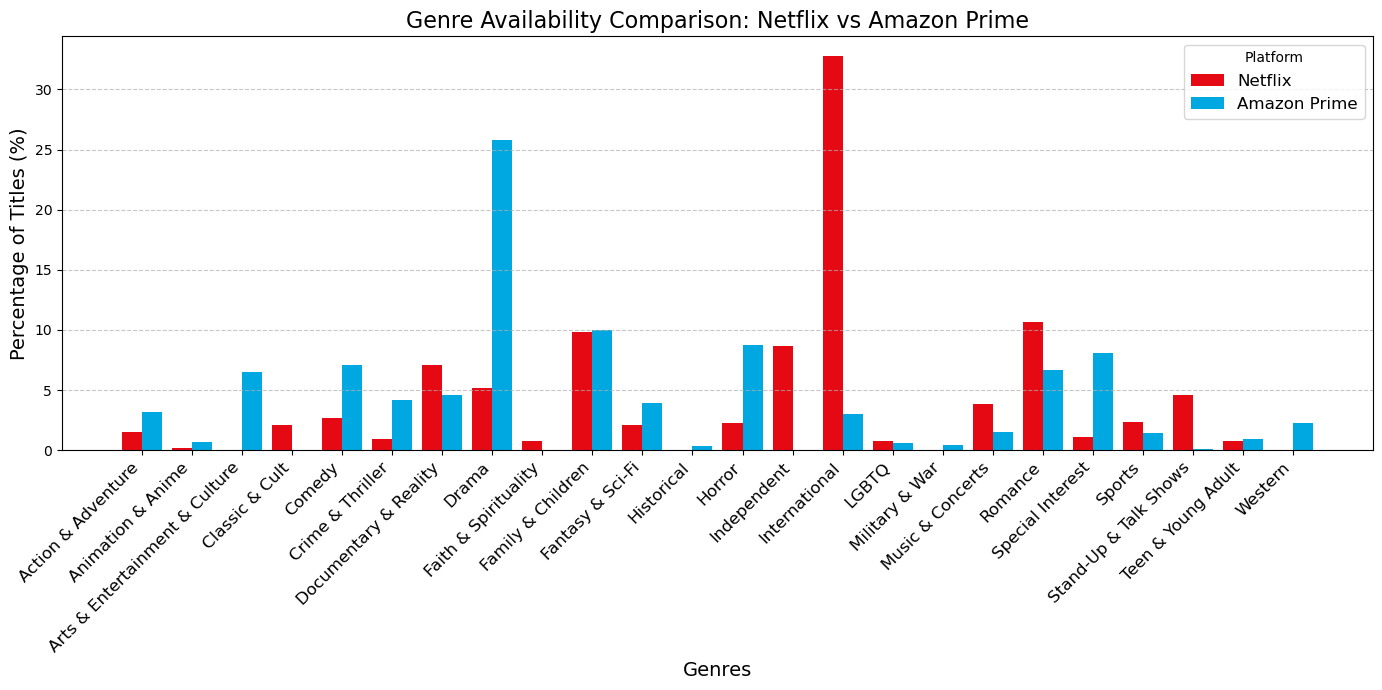

In [41]:
# Prepare for visualization
plt.figure(figsize=(14, 7))
x = range(len(genre_comparison_pivot.index))

# Bar positions
width = 0.4
plt.bar([i - width/2 for i in x], genre_comparison_pivot['Netflix'], width=width, label='Netflix', color='#E50914')
plt.bar([i + width/2 for i in x], genre_comparison_pivot['Amazon Prime'], width=width, label='Amazon Prime', color='#00A8E1')

# Customize the plot
plt.title('Genre Availability Comparison: Netflix vs Amazon Prime', fontsize=16)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Percentage of Titles (%)', fontsize=14)
plt.xticks(x, genre_comparison_pivot.index, rotation=45, ha='right', fontsize=12)
plt.legend(title='Platform', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()


#### Results
Amazon dominates most genres, with its strongest presence in Drama (25.78%). Netflix leads in fewer genres, including International (32.78%), Documentaries & Reality (7.08%), and Romance (10.67%). Netflix uniquely offers genres like Classic & Cult, Faith & Spirituality, Independent, and Stand-Up & Talk Shows, while Amazon has exclusive genres such as Arts & Entertainment, Historical, Military & War, and Western.

#### Insights
1. **Amazon's Dominance**:
   - Amazon leads in most genres, with its strongest presence in **Drama** (25.78% of content).
   - Other notable genres for Amazon include **Family & Children**, **Horror**, and **Special Interest**.

2. **Netflix's Strengths**:
   - Netflix leads in a few key genres, such as:
     - **International Content** (32.78%)
     - **Documentaries & Reality** (7.08%)
     - **Romance** (10.67%)
   - Netflix’s focus on diverse and global content is evident in its dominance in International genres.

3. **Unique Offerings**:
   - **Netflix** offers exclusive genres like:
     - **Classic & Cult**
     - **Faith & Spirituality**
     - **Independent**
     - **Stand-Up & Talk Shows**
   - **Amazon** features unique genres, including:
     - **Arts & Entertainment**
     - **Historical**
     - **Military & War**
     - **Western**

4. **Audience Focus**:
   - Amazon’s strength lies in traditional and niche genres, appealing to audiences interested in **Drama**, **Arts**, and **Special Interest** content.
   - Netflix caters to a global and diverse audience, with significant offerings in **International**, **Independent**, and **Stand-Up** content.

5. **Opportunities for Growth**:
   - **Amazon**: Expand its International content and diversify into underrepresented genres like Independent and LGBTQ.
   - **Netflix**: Strengthen its Drama portfolio to compete with Amazon’s dominance in this area.
   - Both platforms could increase focus on underserved genres such as **Military & War** and **Faith & Spirituality** to attract niche viewers.

#### 1.3 How does the diversity of country representation in content differ between Netflix and Amazon Prime?

In [68]:
# Extract unique countries from Netflix and Amazon datasets
netflix_countries = netflix['country'].dropna().str.split(',').explode().str.strip().unique()
amazon_countries = amazon['country'].dropna().str.split(',').explode().str.strip().unique()

# Convert to sets for easier comparison and sorting
netflix_countries_set = set(netflix_countries)
amazon_countries_set = set(amazon_countries)

# Sort the unique countries for readability
sorted_netflix_countries = sorted(netflix_countries_set)
sorted_amazon_countries = sorted(amazon_countries_set)

# Print the unique countries
print("Unique countries in Netflix:")
print(sorted_netflix_countries)

print("\nUnique countries in Amazon Prime:")
print(sorted_amazon_countries)


Unique countries in Netflix:
['', 'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Belarus', 'Belgium', 'Bermuda', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 'Chile', 'China', 'Colombia', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'East Germany', 'Ecuador', 'Egypt', 'Ethiopia', 'Finland', 'France', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Latvia', 'Lebanon', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malawi', 'Malaysia', 'Malta', 'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Nigeria', 'Norway', 'Pakistan', 'Palestine', 'Panama', 'Paraguay

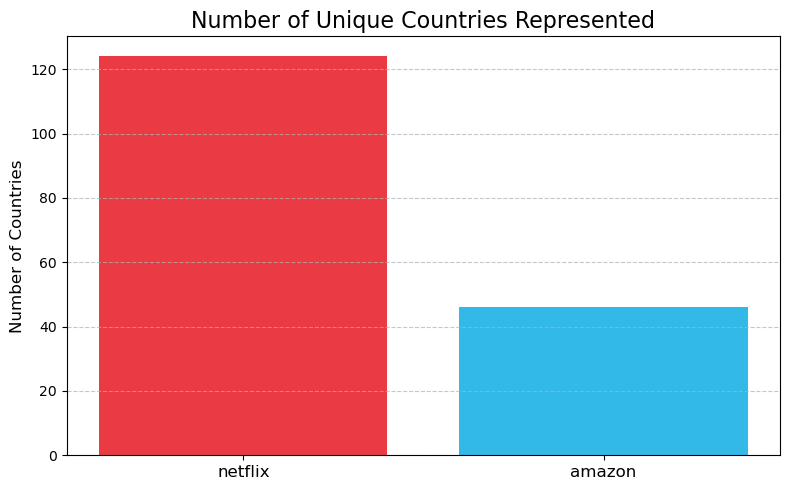

In [69]:
import matplotlib.pyplot as plt

# Count unique countries for each platform
netflix_country_count = len(netflix_countries_set)
amazon_country_count = len(amazon_countries_set)

# Data for visualization
platforms = ['netflix', 'amazon']
country_counts = [netflix_country_count, amazon_country_count]

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(platforms, country_counts, color=['#E50914', '#00A8E1'], alpha=0.8)
plt.title('Number of Unique Countries Represented', fontsize=16)
plt.ylabel('Number of Countries', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


#### Results
- **Netflix**: Lists 123 unique countries (including "Unknown").
- **Amazon Prime**: Lists 46 unique countries (including "Unknown").It should be noted that there was a significant lack of data in the country column for the Amazon dataset hence the large difference

#### Insights
Netflix caters to a broader range of countries suggesting that Netflix has made greater investments in international content, potentially as part of their global expansion strategy.

### 2. Time-Based Analysis:
We will examine how the two platforms have evolved over the years. We’ll look at when content was released and added to each platform to identify trends in growth and activity. This can help us understand which platform is more dynamic in content addition.

#### 2.1 How have the platforms grown over time (based on release_year and year_added)?

In [53]:
# Netflix content by when it was added to the platform
netflix_by_platform_add_year = netflix.groupby('year_added').size().reset_index(name='titles_count')

# Netflix content by original release year
netflix_by_original_release_year = netflix.groupby('release_year').size().reset_index(name='titles_count')

# Amazon content by original release year
amazon_by_original_release_year = amazon.groupby('release_year').size().reset_index(name='titles_count')


In [120]:
# Calculate percentage of titles added per year for Netflix
filtered_data = netflix_by_platform_add_year[
    netflix_by_platform_add_year['year_added'].notna() & 
    (netflix_by_platform_add_year['year_added'] != 'Unknown')
].copy()

# Add a percentage column
filtered_data['percentage'] = (
    filtered_data['titles_count'] / filtered_data['titles_count'].sum() * 100
)

# Print the percentages
print("Year Added | Percentage of Titles Added")
print(filtered_data[['year_added', 'percentage']].to_string(index=False, float_format="%.2f"))

Year Added | Percentage of Titles Added
year_added  percentage
      2008        0.02
      2009        0.02
      2010        0.01
      2011        0.15
      2012        0.03
      2013        0.13
      2014        0.27
      2015        0.93
      2016        4.88
      2017       13.50
      2018       18.75
      2019       22.92
      2020       21.36
      2021       17.03


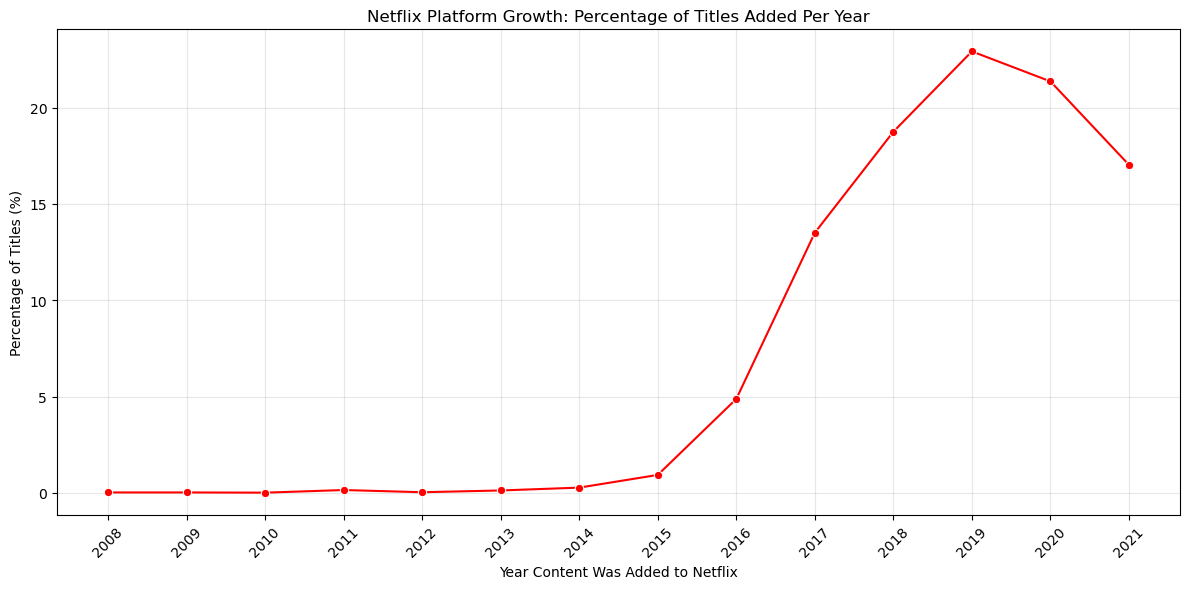

In [121]:
# Plot the percentage growth over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_data, x='year_added', y='percentage', color='red', marker='o')
plt.title('Netflix Platform Growth: Percentage of Titles Added Per Year')
plt.xlabel('Year Content Was Added to Netflix')
plt.ylabel('Percentage of Titles (%)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [122]:
# Filter out rows with missing or 'Unknown' release_year from both dataframes
netflix_filtered = netflix_by_original_release_year[
    netflix_by_original_release_year['release_year'].notna()
].copy()
amazon_filtered = amazon_by_original_release_year[
    amazon_by_original_release_year['release_year'].notna()
].copy()

# Rename columns for clarity
netflix_filtered = netflix_filtered.rename(columns={'titles_count': 'Netflix_Titles'})
amazon_filtered = amazon_filtered.rename(columns={'titles_count': 'Amazon_Titles'})

# Calculate percentages for each platform
netflix_filtered['Netflix_Percent'] = (
    netflix_filtered['Netflix_Titles'] /
    netflix_filtered['Netflix_Titles'].sum() * 100
)
amazon_filtered['Amazon_Percent'] = (
    amazon_filtered['Amazon_Titles'] /
    amazon_filtered['Amazon_Titles'].sum() * 100
)

# Merge the filtered dataframes on release_year
combined_df = netflix_filtered[['release_year', 'Netflix_Percent']].merge(
    amazon_filtered[['release_year', 'Amazon_Percent']],
    on='release_year', how='outer'
).fillna(0).sort_values('release_year')

# Print the percentages
print("Original Release Year | Netflix (%) | Amazon Prime (%)")
print(combined_df.to_string(
    index=False,
    columns=['release_year', 'Netflix_Percent', 'Amazon_Percent'],
    float_format="%.2f"
))

Original Release Year | Netflix (%) | Amazon Prime (%)
 release_year  Netflix_Percent  Amazon_Percent
         1920             0.00            0.03
         1922             0.00            0.02
         1923             0.00            0.01
         1924             0.00            0.01
         1925             0.01            0.08
         1926             0.00            0.02
         1927             0.00            0.01
         1929             0.00            0.04
         1930             0.00            0.05
         1931             0.00            0.03
         1932             0.00            0.08
         1933             0.00            0.05
         1934             0.00            0.12
         1935             0.00            0.16
         1936             0.00            0.30
         1937             0.00            0.25
         1938             0.00            0.16
         1939             0.00            0.22
         1940             0.00            0.17
     

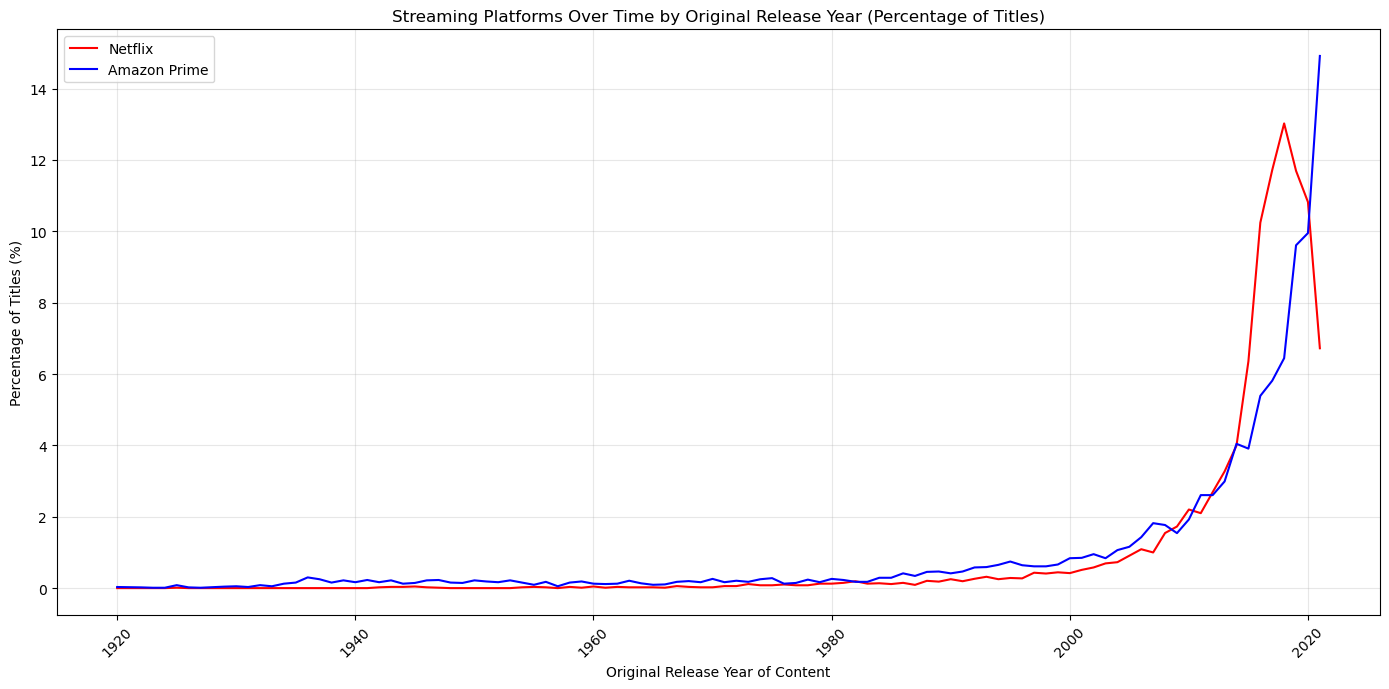

In [125]:
# Plot the percentage growth over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=combined_df, x='release_year', y='Netflix_Percent',
             label='Netflix', color='red')
sns.lineplot(data=combined_df, x='release_year', y='Amazon_Percent',
             label='Amazon Prime', color='blue')
plt.title('Streaming Platforms Over Time by Original Release Year (Percentage of Titles)')
plt.xlabel('Original Release Year of Content')
plt.ylabel('Percentage of Titles (%)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

#### Results
1. **Netflix Growth (Year Added)**:

There was rapid growth between **2016–2019**, peaking in **2019** with ~23% of titles added.This shows that Netflix used this period to aggressively expanded its catalog.There was then a slight decline in additions after 2020.

2. **Original Release Year**:
- **Classic & Mid‑Century (1920–1960)**: Each decade contributes < 1% of titles for both platforms.
- **Rise of Modern Content (1960–1990)**: Gradual increase; by the late 1980s each release year accounts for ~0.2 – 0.5% of catalog.
- **Boom in Late 1990s–Early 2000s**:  
  - Netflix peaks around 1999 (0.44%) and 2003 (0.69%).  
  - Amazon also shows strong shares in 1999–2002 (0.66 – 0.95%).
- **Steady Growth (2004–2013)**: Both platforms add ~0.7 – 3.3% per year; Netflix edge grows from 2006 onward.
- **Recent Content (2014–2021)**:  
  - **Netflix**: Peaks in 2018 (13.02%), then tapers to 6.72% in 2021.  
  - **Amazon Prime**: Climbing sharply, reaching **14.92%** for 2021 releases—its highest share.

#### Insights:
- Netflix’s aggressive catalog expansion in the late 2010s reflects its effort to establish market dominance.
- Amazon Prime’s focus on newer releases highlights its strategy to attract users with fresh content.


### 3. Audience Suitability:
We will analyze the suitability of content for different audience groups based on ratings. This includes exploring if one platform caters more to adults or family-friendly audiences compared to the other.

#### 3.1 What are the differences in content ratings between Netflix and Amazon Prime (e.g., TV-MA, PG-13)?

In [63]:
# Check unique ratings in Netflix
netflix_unique_ratings = netflix['rating'].unique()
print("Unique Ratings in Netflix:")
print(netflix_unique_ratings)

# Check unique ratings in Amazon Prime
amazon_unique_ratings = amazon['rating'].unique()
print("\nUnique Ratings in Amazon Prime:")
print(amazon_unique_ratings)


Unique Ratings in Netflix:
['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' 'Unknown' 'TV-Y7-FV' 'UR']

Unique Ratings in Amazon Prime:
['Unknown' '13+' 'ALL' '18+' 'R' 'TV-Y' 'TV-Y7' 'NR' '16+' 'TV-PG' '7+'
 'TV-14' 'TV-NR' 'TV-G' 'PG-13' 'TV-MA' 'G' 'PG' 'NC-17' 'UNRATED' '16'
 'AGES_16_' 'AGES_18_' 'ALL_AGES' 'NOT_RATE']


#### 3.2 Which platform offers more content suitable for specific age groups?

#### Content Rating Abbreviations and Standardization
##### 1. MPAA Film Ratings (United States)
- **G**: General Audiences – All ages admitted
- **PG**: Parental Guidance Suggested – Some material may not be suitable for children
- **PG-13**: Parents Strongly Cautioned – Some material may be inappropriate for children under 13
- **R**: Restricted – Under 17 requires accompanying parent or adult guardian
- **NC-17**: No One 17 and Under Admitted

##### 2.TV Parental Guidelines (United States)
- **TV-Y**: All Children – Content suitable for all children
- **TV-Y7**: Directed to Older Children – Content suitable for children age 7 and above
- **TV-Y7-FV**: Directed to Older Children – Contains fantasy violence
- **TV-G**: General Audience – Most parents would find this content suitable for all ages
- **TV-PG**: Parental Guidance Suggested – Contains material parents might find unsuitable for younger children
- **TV-14**: Parents Strongly Cautioned – Contains material that many parents would find unsuitable for children under 14
- **TV-MA**: Mature Audience Only – Specifically designed to be viewed by adults

##### 4.Other Rating Terms
- **NR** or **UR**: Not Rated
- **UNRATED**: Often indicates content released without submitting to rating boards
- **7+**, **13+**, **16+**, **18+**: Age-based ratings common in international markets
- **ALL** or **ALL_AGES**: Content suitable for viewers of all ages
- **AGES_16_** and **AGES_18_**: Age-restricted content markers

#### Standardization Methodology

To enable meaningful comparison between Netflix and Amazon Prime content libraries, these diverse rating systems were standardized into the following categories:

| Standardized Category | Original Ratings Included |
|----------------------|---------------------------|
| **Children** | TV-Y, TV-Y7, TV-Y7-FV, G, TV-G |
| **Family** | TV-PG, PG, 7+ |
| **Teen** | TV-14, PG-13, 13+, 16, 16+, AGES_16_ |
| **General Audience** | ALL, ALL_AGES |
| **Adult** | TV-MA, R, NC-17, 18+, AGES_18_ |
| **Unrated** | NR, UNRATED, UR, TV-NR, NOT_RATE, UNKNOWN |

This standardization allows us to compare content distributions across platforms despite their different rating systems, providing insight into each platform's content focus and target audience priorities.

#### Data Quality Note

Some rating values in the Netflix dataset were incorrectly populated with duration information (e.g., '74 min'). These were classified as "Data Error" and excluded from the visualization.

In [78]:
# Define a function to standardize ratings across platforms with revised categorization
def standardize_rating(rating):
    """
    Maps various rating formats to standardized categories:
    - Children: Content specifically made for young children
    - Family: Content suitable for family viewing including older children
    - Teen: Content suitable for teenagers and above
    - Adult: Content for mature/adult audiences only
    - General: Content suitable for most audiences (children, family, and teens)
    - Unrated: Content without a rating
    """
    # Convert to string and uppercase for consistency
    rating = str(rating).upper().strip()
    
    # Children's content (specifically targeting young children)
    if rating in ['TV-Y', 'TV-Y7', 'TV-Y7-FV', 'G', 'TV-G']:
        return 'Children'
    
    # Family content
    elif rating in ['TV-PG', 'PG', '7+']:
        return 'Family'
    
    # Teen content
    elif rating in ['TV-14', 'PG-13', '13+', '16', '16+', 'AGES_16_']:
        return 'Teen'
    
    # General audience (spanning children, family, and teens)
    elif rating in ['ALL', 'ALL_AGES']:
        return 'General Audience'
    
    # Adult content
    elif rating in ['TV-MA', 'R', '18+', 'AGES_18_', 'NC-17']:
        return 'Adult'
        
    # Handle unrated and unknown categories
    elif rating in ['NR', 'UNRATED', 'UR', 'TV-NR', 'NOT_RATE', 'UNKNOWN', 'NAN', '']:
        return 'Unrated'
    
    # Handle the duration values incorrectly classified as ratings
    elif 'MIN' in rating or rating.replace(' ', '').isdigit():
        return 'Data Error'
    
    # Catch any remaining unclassified ratings
    else:
        return 'Other'

# Apply standardization to Netflix data
netflix['standardized_rating'] = netflix['rating'].apply(standardize_rating)

# Apply standardization to Amazon data
amazon['standardized_rating'] = amazon['rating'].apply(standardize_rating)

# Now create a comparison of standardized ratings distribution
netflix_ratings = netflix['standardized_rating'].value_counts().reset_index()
netflix_ratings.columns = ['Rating_Category', 'Netflix_Count']
netflix_ratings['Netflix_Percentage'] = netflix_ratings['Netflix_Count'] / netflix_ratings['Netflix_Count'].sum() * 100

amazon_ratings = amazon['standardized_rating'].value_counts().reset_index()
amazon_ratings.columns = ['Rating_Category', 'Amazon_Count'] 
amazon_ratings['Amazon_Percentage'] = amazon_ratings['Amazon_Count'] / amazon_ratings['Amazon_Count'].sum() * 100

# Merge for comparison
ratings_comparison = netflix_ratings.merge(amazon_ratings, on='Rating_Category', how='outer').fillna(0)

# Sort by categories in a logical order
category_order = ['Children', 'Family', 'Teen', 'Mature', 'Adult', 'Unrated', 'Data Error', 'Other']
ratings_comparison['Rating_Category'] = pd.Categorical(
    ratings_comparison['Rating_Category'], 
    categories=category_order, 
    ordered=True
)
ratings_comparison = ratings_comparison.sort_values('Rating_Category')

# Display the comparison
print(ratings_comparison)

  Rating_Category  Netflix_Count  Netflix_Percentage  Amazon_Count  \
3        Children          908.0           10.309981         287.0   
2          Family         1150.0           13.057795         807.0   
1            Teen         2650.0           30.089701        4268.0   
0           Adult         4009.0           45.520609        2336.0   
4         Unrated           87.0            0.987851         701.0   
5      Data Error            3.0            0.034064           0.0   
6             NaN            0.0            0.000000        1269.0   

   Amazon_Percentage  
3           2.968556  
2           8.347125  
1          44.145635  
0          24.162185  
4           7.250724  
5           0.000000  
6          13.125776  


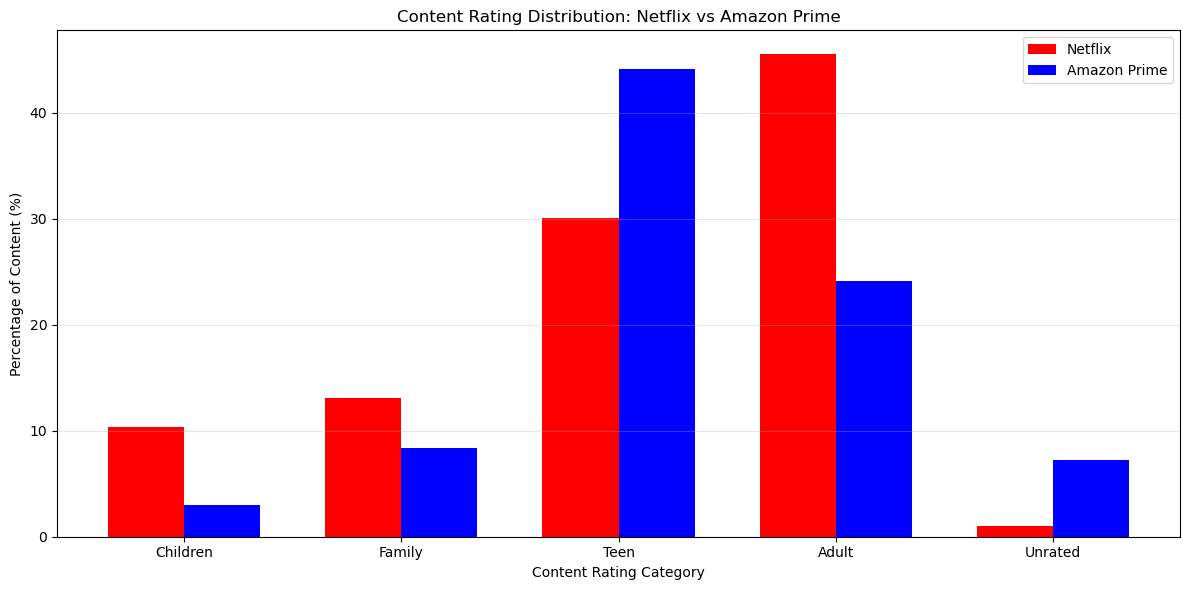

In [79]:
# Filter the categories for visualization
categories_to_display = ['Children', 'Family', 'General Audience', 'Teen', 'Mature', 'Adult', 'Unrated']
filtered_comparison = ratings_comparison[ratings_comparison['Rating_Category'].isin(categories_to_display)].copy()

# Sort by the predefined category order
filtered_comparison.loc[:, 'Rating_Category'] = pd.Categorical(
    filtered_comparison['Rating_Category'], 
    categories=categories_to_display, 
    ordered=True
)
filtered_comparison = filtered_comparison.sort_values('Rating_Category')

# Visualize the comparison with updated colors
plt.figure(figsize=(12, 6))
x = np.arange(len(filtered_comparison))
width = 0.35

# Amazon Prime in blue, Netflix in red
plt.bar(x - width/2, filtered_comparison['Netflix_Percentage'], width, label='Netflix', color='red')
plt.bar(x + width/2, filtered_comparison['Amazon_Percentage'], width, label='Amazon Prime', color='blue')

plt.xlabel('Content Rating Category')
plt.ylabel('Percentage of Content (%)')
plt.title('Content Rating Distribution: Netflix vs Amazon Prime')
plt.xticks(x, filtered_comparison['Rating_Category'])
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

#### Results
1. **Adult Content**:
   - Netflix leads with **45.5%** of its content rated for adults compared to Amazon's **24.2%**.
2. **Teen Content**:
   - Amazon dominates, with **44.1%** of its library targeting teens, surpassing Netflix's **30.1%**.
3. **Children & Family Content**:
   - Netflix has a higher share in these categories (**23.4% combined**) compared to Amazon (**11.3% combined**).
4. **Unrated Content**:
   - Amazon has more unrated titles (**7.3%**) than Netflix (**1.0%**), indicating potential metadata gaps in Amazon's catalog.

#### Insights:
- **Netflix**: Focuses heavily on **adult and family-friendly content**, appealing to a broad demographic.
- **Amazon Prime**: Prioritizes **teen-centric content**, potentially targeting younger audiences.
- **Unrated Titles**: The significant presence of unrated content on Amazon suggests challenges in content labeling, which may impact user trust.


### 4. Key Metrics:
We will evaluate measurable attributes like content duration and representation of directors and cast. This will help identify whether one platform emphasizes longer or shorter shows and how diverse their representation is.

- Which platform has a higher average content duration?

In [85]:
# Get unique durations in the Netflix dataset
netflix_unique_durations = netflix['duration'].unique()

# Get unique durations in the Amazon dataset
amazon_unique_durations = amazon['duration'].unique()

# Display the unique durations
print("Unique durations in Netflix dataset:", netflix_unique_durations)
print("Unique durations in Amazon dataset:", amazon_unique_durations)

Unique durations in Netflix dataset: ['90 min' '2 Seasons' '1 Season' '91 min' '125 min' '9 Seasons' '104 min'
 '127 min' '4 Seasons' '67 min' '94 min' '5 Seasons' '161 min' '61 min'
 '166 min' '147 min' '103 min' '97 min' '106 min' '111 min' '3 Seasons'
 '110 min' '105 min' '96 min' '124 min' '116 min' '98 min' '23 min'
 '115 min' '122 min' '99 min' '88 min' '100 min' '6 Seasons' '102 min'
 '93 min' '95 min' '85 min' '83 min' '113 min' '13 min' '182 min' '48 min'
 '145 min' '87 min' '92 min' '80 min' '117 min' '128 min' '119 min'
 '143 min' '114 min' '118 min' '108 min' '63 min' '121 min' '142 min'
 '154 min' '120 min' '82 min' '109 min' '101 min' '86 min' '229 min'
 '76 min' '89 min' '156 min' '112 min' '107 min' '129 min' '135 min'
 '136 min' '165 min' '150 min' '133 min' '70 min' '84 min' '140 min'
 '78 min' '7 Seasons' '64 min' '59 min' '139 min' '69 min' '148 min'
 '189 min' '141 min' '130 min' '138 min' '81 min' '132 min' '10 Seasons'
 '123 min' '65 min' '68 min' '66 min' '62 mi

In [93]:
# Function to separate TV series and movies
def separate_tv_movies(df):
    tv_series = df[df['duration'].str.contains('Season', na=False)]
    movies = df[df['duration'].str.contains('min', na=False)]
    return tv_series, movies

# Separate Netflix and Amazon datasets
netflix_tv, netflix_movies = separate_tv_movies(netflix)
amazon_tv, amazon_movies = separate_tv_movies(amazon)


Netflix Seasons Percentage:
 seasons
1     67.028037
2     15.887850
3      7.439252
4      3.551402
5      2.429907
6      1.233645
7      0.859813
8      0.635514
9      0.336449
10     0.261682
11     0.074766
12     0.074766
13     0.112150
15     0.074766
Name: count, dtype: float64
Amazon Prime Seasons Percentage:
 seasons
1     72.501351
2     12.371691
3      5.942734
4      3.349541
5      2.106969
6      1.242572
7      0.810373
8      0.540249
9      0.324149
10     0.270124
11     0.162075
12     0.162075
14     0.162075
15     0.054025
Name: count, dtype: float64


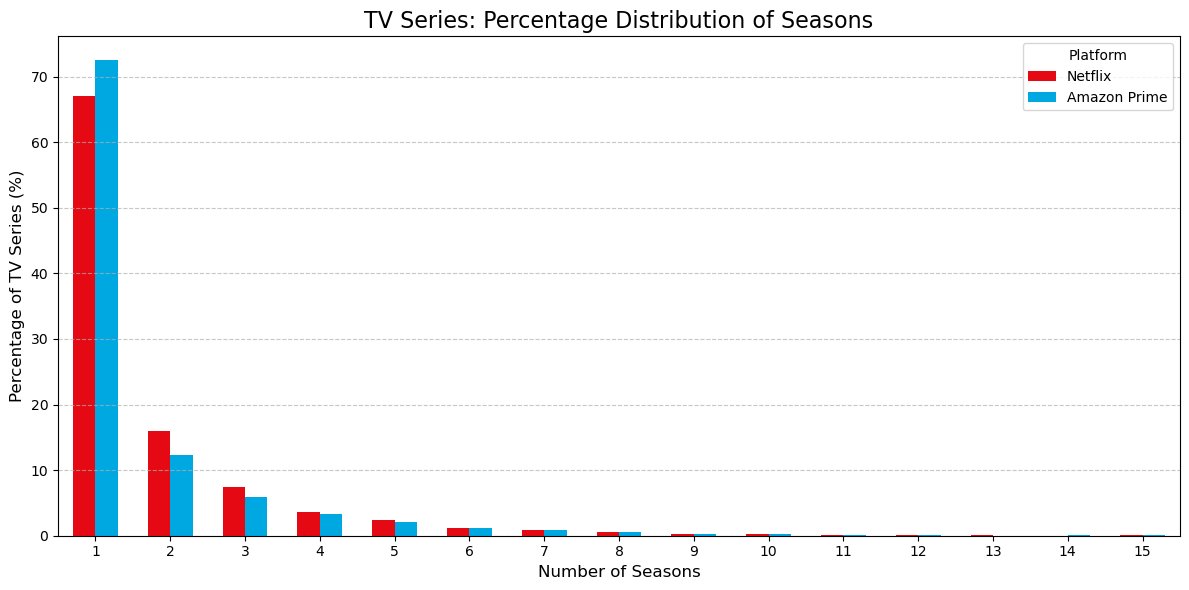

In [114]:
# Function to clean, count, and calculate percentages for seasons
def clean_and_calculate_percentages(tv_series):
    # Create a copy to avoid modifying the original DataFrame
    tv_series = tv_series.copy()
    
    # Standardize the "duration" column
    tv_series['duration_cleaned'] = tv_series['duration'].str.lower().str.strip()
    
    # Extract numeric season values
    tv_series['seasons'] = tv_series['duration_cleaned'].str.extract(r'(\d+)').astype(int)
    
    # Filter to include only reasonable season values (e.g., 1 to 15)
    tv_series = tv_series[(tv_series['seasons'] >= 1) & (tv_series['seasons'] <= 15)]
    
    # Count occurrences of each season
    season_counts = tv_series['seasons'].value_counts().sort_index()
    
    # Calculate percentages
    total = season_counts.sum()
    season_percentages = (season_counts / total) * 100
    
    return season_percentages

# Clean and calculate percentages for Netflix and Amazon
netflix_seasons_percentage = clean_and_calculate_percentages(netflix_tv)
amazon_seasons_percentage = clean_and_calculate_percentages(amazon_tv)

# Debug: Verify percentages
print("Netflix Seasons Percentage:\n", netflix_seasons_percentage)
print("Amazon Prime Seasons Percentage:\n", amazon_seasons_percentage)

# Plotting the TV series season distribution as percentages
plt.figure(figsize=(12, 6))

# Bar chart for Netflix
plt.bar(netflix_seasons_percentage.index - 0.15, netflix_seasons_percentage.values, width=0.3, label='Netflix', color='#E50914')

# Bar chart for Amazon Prime
plt.bar(amazon_seasons_percentage.index + 0.15, amazon_seasons_percentage.values, width=0.3, label='Amazon Prime', color='#00A8E1')

# Limit x-axis dynamically to the filtered season range
x_min = 1  # Minimum valid season
x_max = 15  # Maximum valid season
plt.xlim(x_min - 0.5, x_max + 0.5)

# Add labels and title
plt.title('TV Series: Percentage Distribution of Seasons', fontsize=16)
plt.xlabel('Number of Seasons', fontsize=12)
plt.ylabel('Percentage of TV Series (%)', fontsize=12)

# Adjust x-axis ticks for valid range
plt.xticks(range(x_min, x_max + 1), fontsize=10)

# Add legend and grid
plt.legend(title='Platform', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


Bin Edges: [  3.   13.3  23.6  33.9  44.2  54.5  64.8  75.1  85.4  95.7 106.  116.3
 126.6 136.9 147.2 157.5 167.8 178.1 188.4 198.7 209.  219.3 229.6 239.9
 250.2 260.5 270.8 281.1 291.4 301.7 312. ]
Bin Percentages: [2.12140992e-01 7.66971279e-01 1.41971279e+00 1.10966057e+00
 2.46409922e+00 3.76958225e+00 5.09138381e+00 8.20822454e+00
 2.08877285e+01 1.92395561e+01 1.41971279e+01 8.48563969e+00
 5.84203655e+00 3.47584856e+00 1.97454308e+00 1.30548303e+00
 7.18015666e-01 3.26370757e-01 1.79503916e-01 1.14229765e-01
 6.52741514e-02 4.89556136e-02 4.89556136e-02 0.00000000e+00
 1.63185379e-02 0.00000000e+00 1.63185379e-02 0.00000000e+00
 0.00000000e+00 1.63185379e-02]
Bin Edges: [  0.          20.03333333  40.06666667  60.1         80.13333333
 100.16666667 120.2        140.23333333 160.26666667 180.3
 200.33333333 220.36666667 240.4        260.43333333 280.46666667
 300.5        320.53333333 340.56666667 360.6        380.63333333
 400.66666667 420.7        440.73333333 460.76666667 48

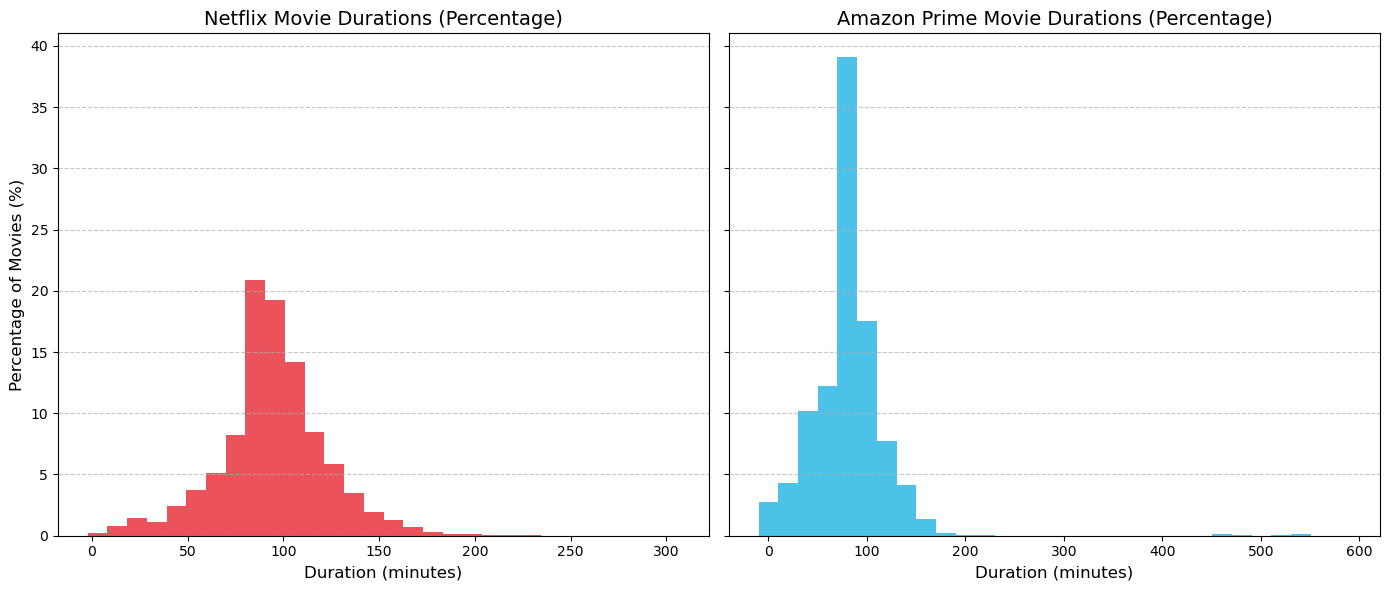

In [116]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate percentage distribution of movie durations
def calculate_movie_durations_percentages(movie_durations):
    # Calculate the percentage of movies in each bin
    bin_counts, bin_edges = np.histogram(movie_durations, bins=30)
    bin_percentages = (bin_counts / bin_counts.sum()) * 100
    
    # Debugging: Print the bin edges and percentages
    print("Bin Edges:", bin_edges)
    print("Bin Percentages:", bin_percentages)
    
    return bin_percentages, bin_edges

# Calculate percentages for Netflix movie durations
netflix_percentages, netflix_edges = calculate_movie_durations_percentages(netflix_movie_durations)

# Calculate percentages for Amazon movie durations
amazon_percentages, amazon_edges = calculate_movie_durations_percentages(amazon_movie_durations)

# Plot side-by-side histograms for movie duration percentages
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Netflix Histogram (Percentage)
axes[0].bar(netflix_edges[:-1], netflix_percentages, width=np.diff(netflix_edges), color='#E50914', alpha=0.7)
axes[0].set_title('Netflix Movie Durations (Percentage)', fontsize=14)
axes[0].set_xlabel('Duration (minutes)', fontsize=12)
axes[0].set_ylabel('Percentage of Movies (%)', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Amazon Histogram (Percentage)
axes[1].bar(amazon_edges[:-1], amazon_percentages, width=np.diff(amazon_edges), color='#00A8E1', alpha=0.7)
axes[1].set_title('Amazon Prime Movie Durations (Percentage)', fontsize=14)
axes[1].set_xlabel('Duration (minutes)', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


#### Results
1. **TV Series Seasons**:
   - Netflix: **67%** of TV series have a single season, with very few having more than 4 seasons.
   - Amazon Prime: **72%** of TV series have a single season, and a similar drop-off is observed for longer-running shows.

2. **Movie Duration (in Minutes)**:
   - Netflix: Most movies fall between **85–116 minutes**, with a sharp decline in movies longer than 150 minutes.
   - Amazon Prime: A similar trend is observed, with most movies under **120 minutes** and a significant drop-off after **180 minutes**.

#### Key Comparisons
- **TV Series**: Both platforms focus heavily on short series (1–2 seasons), with Netflix offering slightly more diversity in longer series (3+ seasons).
- **Movies**: Both platforms align closely in terms of movie duration distributions, with the bulk of content ranging between 80–120 minutes.

#### Insights
- Netflix's slightly broader TV series offering (in terms of longer seasons) may appeal to binge-watchers seeking more in-depth series.
- Amazon's narrower focus on shorter movies and single-season series aligns with a "quick entertainment" strategy.


## Summary of Comparative Analysis: Netflix vs. Amazon Prime

### Key Findings:

1. **Content Type Distribution**:
   - Netflix offers a **more balanced mix** with 69.6% movies and 30.4% TV shows.
   - Amazon Prime has a **stronger focus on movies**, with 80.8% of its content being films and only 19.2% TV shows.

2. **Genre Dominance**:
   - **Amazon** leads in most genres, with its strongest presence in Drama (25.78%).
   - **Netflix** excels in International content (32.78%), Documentaries & Reality (7.08%), and Romance (10.67%).
   - Each platform offers unique genres (e.g., Netflix: Stand-Up & Talk Shows; Amazon: Western).

3. **Country Representation**:
   - Netflix lists titles from 123 unique countries reflecting Netflix's **global content strategy**.

4. **Time-Based Growth**:
   - **Netflix** expanded aggressively between 2016–2019, peaking in 2019 (~23% of titles added).
   - **Amazon** has shown sharper growth in recent releases, with 14.92% of its content from 2021.

5. **Content Ratings**:
   - Netflix focuses on **adult and family-friendly content**, with 45.5% of titles rated for adults and 23.4% for children/families.
   - Amazon targets **teen audiences**, with 44.1% of its catalog catering to this demographic.

6. **TV Series and Movie Durations**:
   - Netflix offers slightly more **diverse TV series** in terms of seasons, though both platforms heavily favor single-season series.
   - Movie durations are comparable, with most films ranging between 80–120 minutes.

---

### Recommendations:

#### For Consumers:
1. **Netflix**:
   - Ideal for viewers seeking **global content**, including International genres and Stand-Up comedy.
   - A better choice for families and adults due to its balanced focus on adult and family-friendly titles.

2. **Amazon Prime**:
   - Best for **teens** and viewers interested in Drama and niche genres like Western and Historical content.
   - Suitable for those who prefer shorter, bingeable series or newer releases.

#### For Platforms:
1. **Netflix**:
   - Expand Drama offerings to compete with Amazon’s dominance in this genre.
   - Diversify niche genres like Military & War to attract underserved audiences.

2. **Amazon Prime**:
   - Strengthen International content to compete with Netflix’s global reach.
   - Improve metadata accuracy, particularly for unrated content, to build user trust.

By aligning content strategies with these insights, both platforms can better meet user preferences and expand their market shares.
